In [1]:
!pip install pandas matplotlib seaborn wordcloud

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud

In [17]:
df = pd.read_csv("twitter_training.csv", header=None)
df.head()

,0,1,2,3
0,2401,Borderlands,Positive,im getting on borderlands and i will murder yo...
1,2401,Borderlands,Positive,I am coming to the borders and I will kill you...
2,2401,Borderlands,Positive,im getting on borderlands and i will kill you ...
3,2401,Borderlands,Positive,im coming on borderlands and i will murder you...
4,2401,Borderlands,Positive,im getting on borderlands 2 and i will murder ...


In [19]:
df.columns = ['ID', 'Entity', 'Sentiment', 'Content']

In [20]:
df.info()
df['Sentiment'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 74682 entries, 0 to 74681
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         74682 non-null  int64 
 1   Entity     74682 non-null  object
 2   Sentiment  74682 non-null  object
 3   Content    73996 non-null  object
dtypes: int64(1), object(3)
memory usage: 2.3+ MB


Sentiment
Negative      22542
Positive      20832
Neutral       18318
Irrelevant    12990
Name: count, dtype: int64

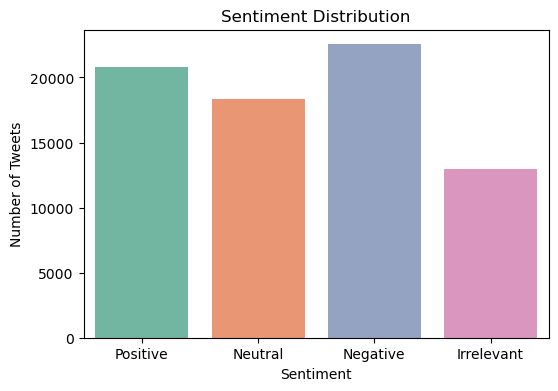

In [21]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Sentiment', hue='Sentiment', palette='Set2', legend=False)
plt.title("Sentiment Distribution")
plt.xlabel("Sentiment")
plt.ylabel("Number of Tweets")
plt.show()

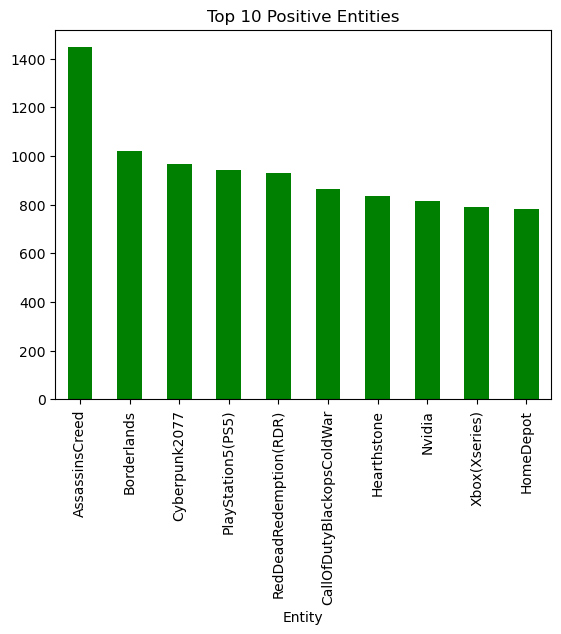

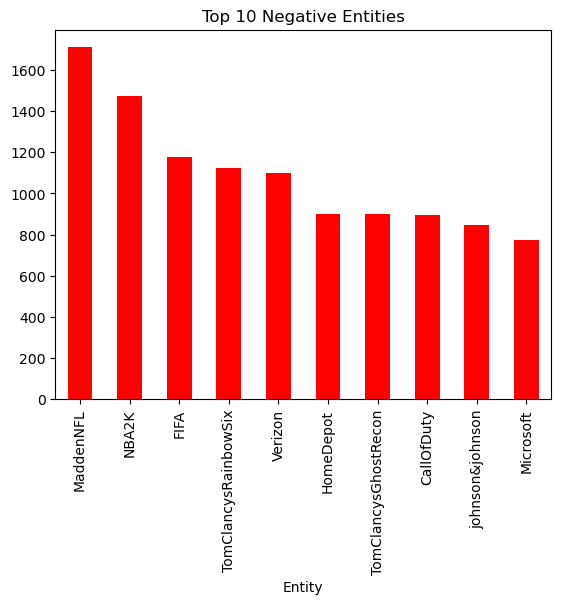

In [22]:
# Top 10 positive entities
df[df['Sentiment'] == 'Positive']['Entity'].value_counts().head(10).plot(kind='bar', color='green', title="Top 10 Positive Entities")
plt.show()

# Top 10 negative entities
df[df['Sentiment'] == 'Negative']['Entity'].value_counts().head(10).plot(kind='bar', color='red', title="Top 10 Negative Entities")
plt.show()

In [23]:
import re

def clean_text(text):
    text = re.sub(r"http\S+|www\S+|https\S+", '', str(text))  # Remove links
    text = re.sub(r'\@\w+|\#', '', text)                      # Remove mentions & hashtags
    return text

df['Clean_Content'] = df['Content'].apply(clean_text)
print(df.columns)

Index(['ID', 'Entity', 'Sentiment', 'Content', 'Clean_Content'], dtype='object')


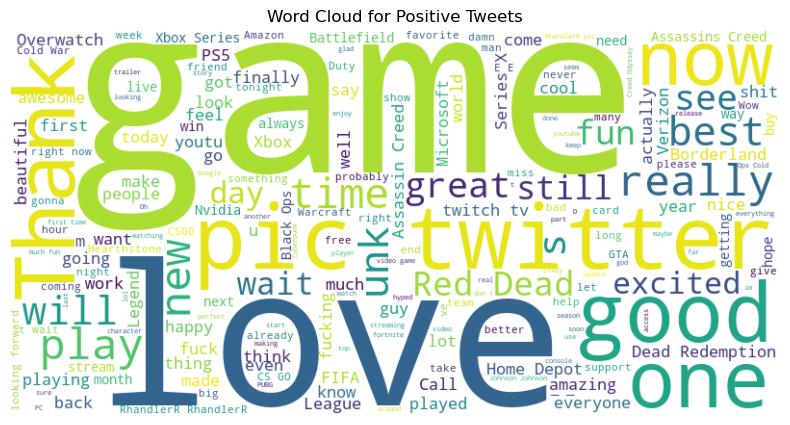

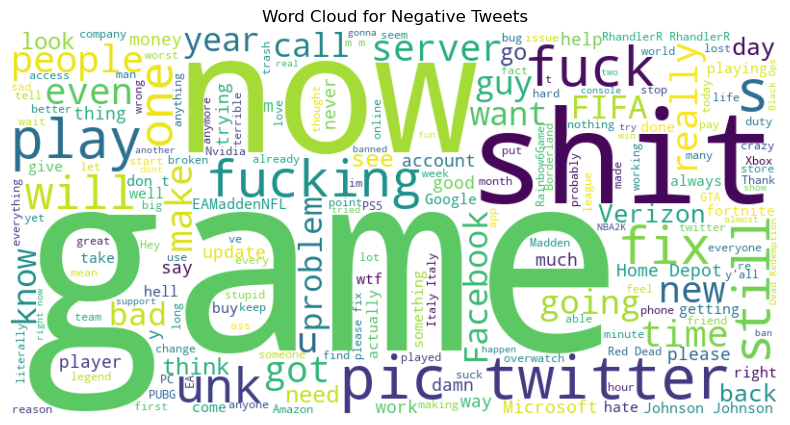

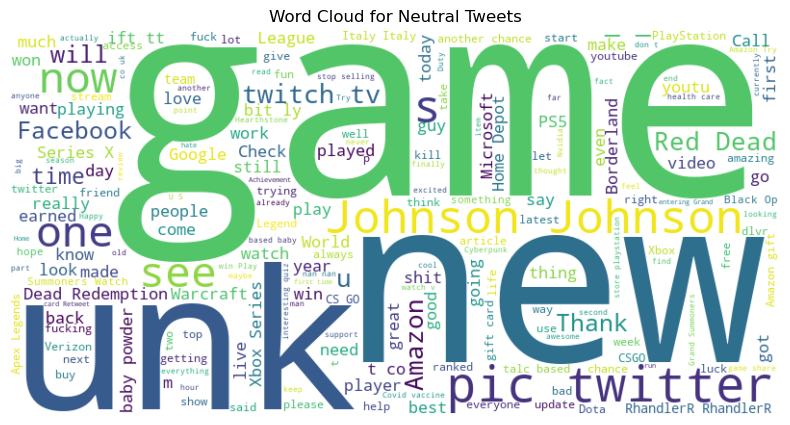

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

for sentiment in ['Positive', 'Negative', 'Neutral']:
    text = " ".join(df[df['Sentiment'] == sentiment]['Clean_Content'])
    wc = WordCloud(width=800, height=400, background_color='white').generate(text)

    plt.figure(figsize=(10, 5))
    plt.imshow(wc, interpolation='bilinear')
    plt.axis('off')
    plt.title(f"Word Cloud for {sentiment} Tweets")
    plt.show()

In [26]:
print(df.columns)

Index(['ID', 'Entity', 'Sentiment', 'Content', 'Clean_Content'], dtype='object')
